In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')



In [2]:
data=pd.read_csv('./Mall_Customers.csv')

In [3]:
# punto 1 analisis exploratorio de los datos
data.head(20)

,identificacion,genero,edad,ingreso_anual,Puntuacion_gastos(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.describe()

,identificacion,edad,ingreso_anual,Puntuacion_gastos(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Valores faltantes o atipicos')

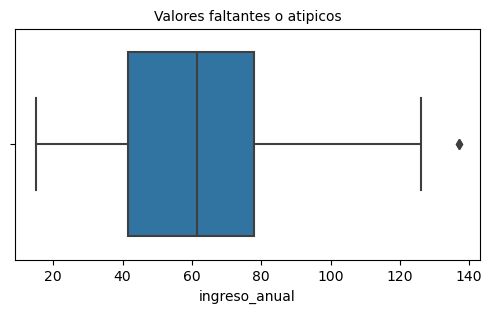

In [5]:
# Valores faltantes y atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['ingreso_anual'])
plt.title('Valores faltantes o atipicos', fontsize=10)

In [6]:
# identificar campos vacios o nulos
celdas_vacias = data.isnull().sum()
print(celdas_vacias)

identificacion              0
genero                      0
edad                        0
ingreso_anual               0
Puntuacion_gastos(1-100)    0
dtype: int64


In [7]:
#punto 2, Procesar los datos y limpiarlos 
print ("Registros en 0 de identificacion=", data ["identificacion"].isin([0]).sum())
print ("Registros en 0 de edad=", data ["edad"].isin([0]).sum())
print ("Registros en 0 de ingreso_anual=", data ["ingreso_anual"].isin([0]).sum())
print ("Registros en 0 de Puntuacion_gastos(1-100)=", data ["Puntuacion_gastos(1-100)"].isin([0]).sum())
# no se registran valores en 0


Registros en 0 de identificacion= 0
Registros en 0 de edad= 0
Registros en 0 de ingreso_anual= 0
Registros en 0 de Puntuacion_gastos(1-100)= 0


In [8]:
print("Cantidad de registros de Depresion_del_ST mayores a 135 es =", (data['ingreso_anual'] > 135).sum())

Cantidad de registros de Depresion_del_ST mayores a 135 es = 2


In [9]:
#Cambiamos los valores mayores a 135 por la media

media = data['ingreso_anual'].mean()
data.loc[data['ingreso_anual'] > 135, 'ingreso_anual'] = media

print("Cantidad de registros de ingreso_anual mayores a 135 es =", (data['ingreso_anual'] > 135).sum())

Cantidad de registros de ingreso_anual mayores a 135 es = 0


Text(0.5, 1.0, 'Valores faltantes o atipicos')

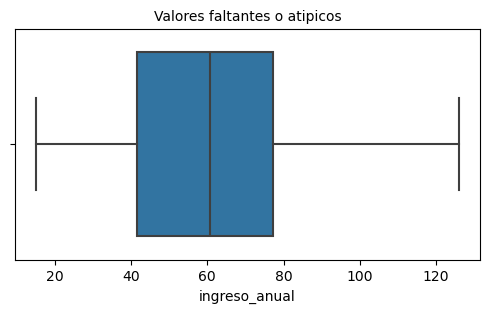

In [10]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['ingreso_anual'])
plt.title('Valores faltantes o atipicos', fontsize=10)

In [11]:
valorRmale = "Male"
valorMale = 1  
data['genero'] = data['genero'].replace(valorRmale, valorMale)

valorFmale = "Female"
valorFemale = 0
data['genero'] = data['genero'].replace(valorFmale, valorFemale)

#Se asigna valor de 1 para male
#Se asigna valor de 0 para Female

data.head(10)

,identificacion,genero,edad,ingreso_anual,Puntuacion_gastos(1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40
5,6,0,22,17.0,76
6,7,0,35,18.0,6
7,8,0,23,18.0,94
8,9,1,64,19.0,3
9,10,0,30,19.0,72


In [12]:

#punto 3 Seleccion de caracteristicas mas relevantes

data=data[["edad","ingreso_anual","Puntuacion_gastos(1-100)"]]
data.head(10)

,edad,ingreso_anual,Puntuacion_gastos(1-100)
0,19,15.0,39
1,21,15.0,81
2,20,16.0,6
3,23,16.0,77
4,31,17.0,40
5,22,17.0,76
6,35,18.0,6
7,23,18.0,94
8,64,19.0,3
9,30,19.0,72


In [13]:
#punto 4 Entrenar el modelo configurando los diferentes hiperparámetros



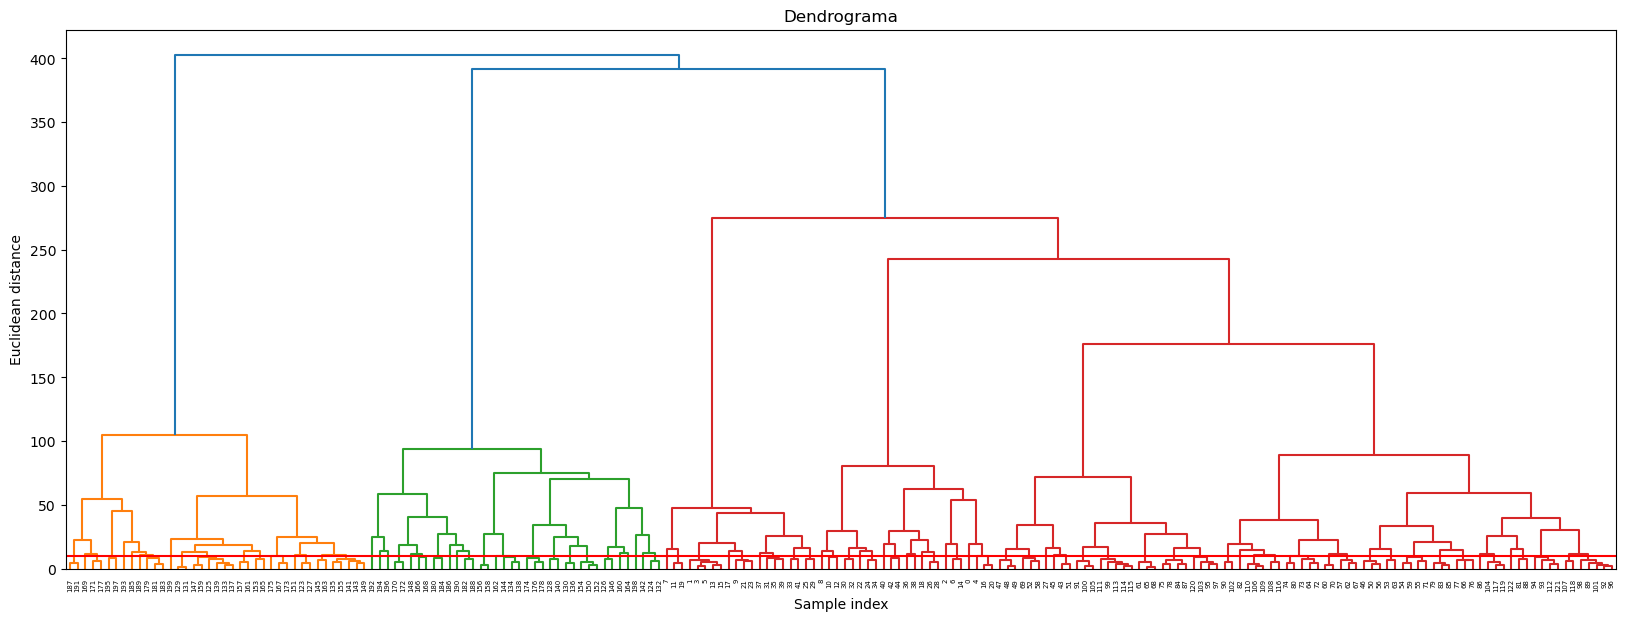

In [15]:
ward_clustering = linkage(data, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [16]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(data)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [17]:
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

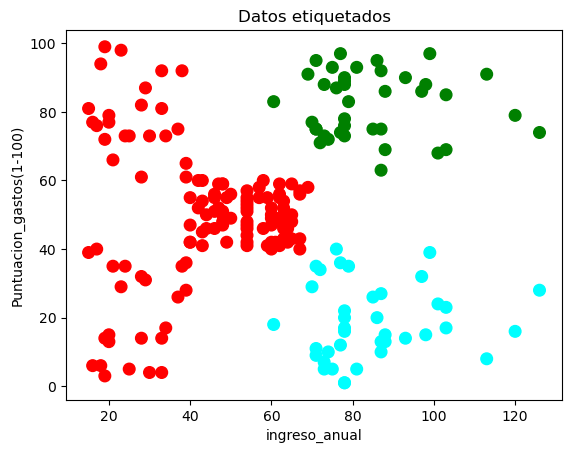

In [20]:
f1 = data['ingreso_anual'].values
f2 = data['Puntuacion_gastos(1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('ingreso_anual')
plt.ylabel('Puntuacion_gastos(1-100)')
plt.show()

In [21]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

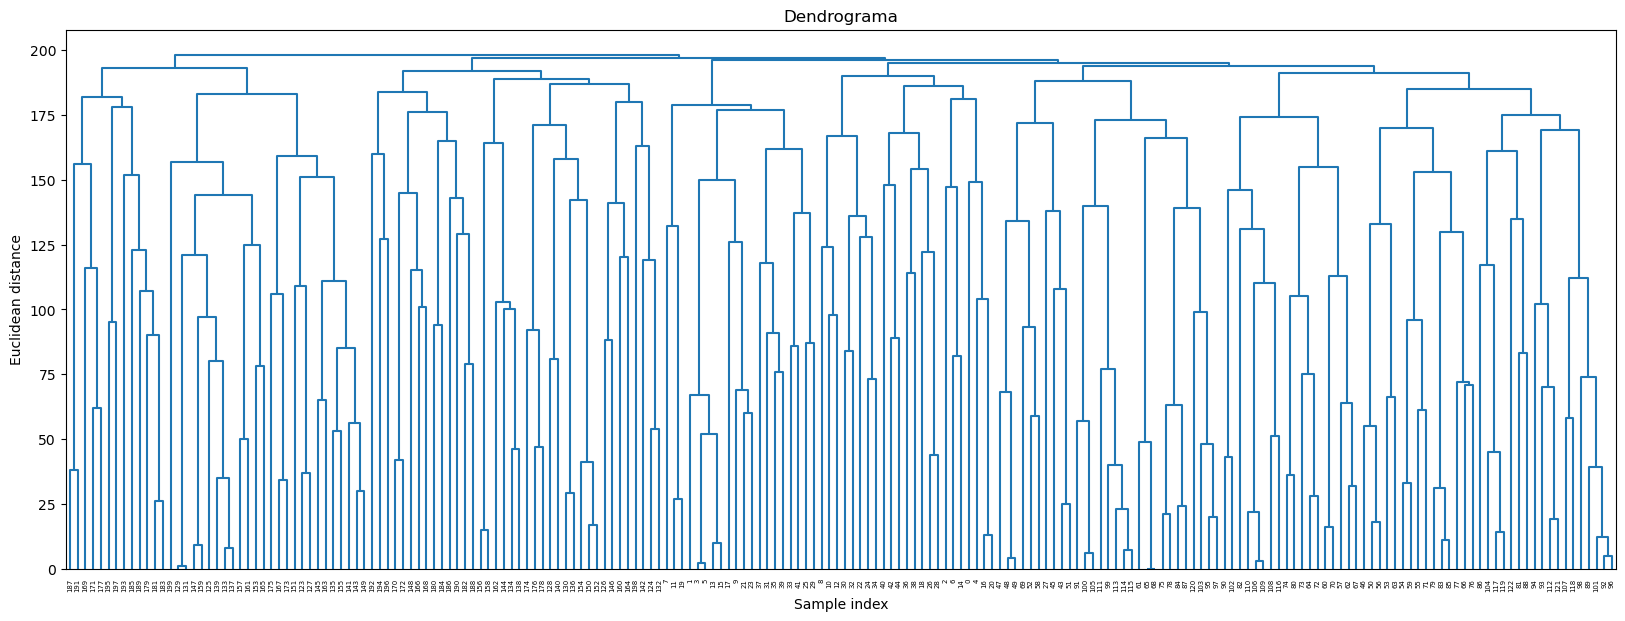

In [22]:
plot_dendrogram(hier_clustering, color_threshold=0)

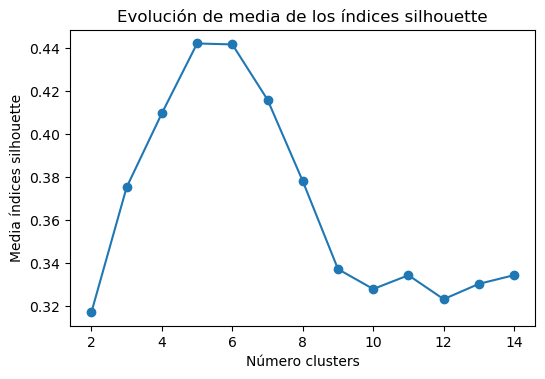

In [24]:
# Método silhouette para identificar el número óptimo de clusters

range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [26]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(data, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(data, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(data, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.37524013511346915
Índice de Calinski-Harabasz: 111.41708716570024
Davies-Bouldin Index: 0.8850268129814062


In [27]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(data)
# Compute the linkage matrix
Z = linkage(data, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6681912369357467, array([274.71341003,  53.60747993, 274.71341003, ..., 402.44343655,
       104.90223453, 402.44343655]))
